In [ ]:
name : omar ramadan abbas ragheb

In [ ]:
i want to create a model that can distinguish positive reviews from negative ones

In [1]:

import os, sys

import pandas as pd
import numpy as np

import nltk 

import string 
import re 
from nltk.corpus import stopwords # Stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from gensim.utils import simple_preprocess  

!pip install wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pickle


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

In [2]:
%%time
df = pd.read_csv('Food_Reviews.csv')

Wall time: 245 ms


In [3]:
f"{df.shape[0]:,} Review"

'9,999 Review'

In [4]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,3
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,3
3,If you are looking for the secret ingredient i...,1
4,Great taffy at a great price. There was a wid...,3


In [5]:
cols = ['Text', 'Score']
df_text = df[cols].copy()
df_text.head()

,Text,Score
0,I have bought several of the Vitality canned d...,3
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,3
3,If you are looking for the secret ingredient i...,1
4,Great taffy at a great price. There was a wid...,3


In [6]:
df.drop_duplicates(inplace=True)
df_text = df[['Text','Score']].copy()
df_text

,Text,Score
0,I have bought several of the Vitality canned d...,3
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,3
3,If you are looking for the secret ingredient i...,1
4,Great taffy at a great price. There was a wid...,3
...,...,...
9994,Their Earl Grey and English breakfast do not c...,1
9995,My daughter loves this tea and so I purchased ...,2
9996,I honestly don't know how this item is allowed...,1
9997,"Enjoy the taste of the tea, however I think it...",2


In [7]:
df_text['target']=df_text.Score.apply(lambda x :0 if x <3 else 1)
df_text

,Text,Score,target
0,I have bought several of the Vitality canned d...,3,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,3,1
3,If you are looking for the secret ingredient i...,1,0
4,Great taffy at a great price. There was a wid...,3,1
...,...,...,...
9994,Their Earl Grey and English breakfast do not c...,1,0
9995,My daughter loves this tea and so I purchased ...,2,0
9996,I honestly don't know how this item is allowed...,1,0
9997,"Enjoy the taste of the tea, however I think it...",2,0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


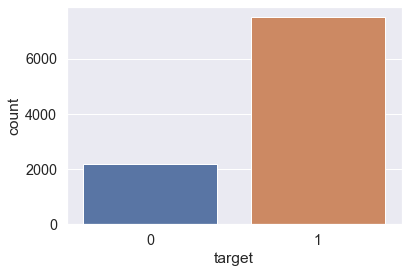

In [8]:
sns.countplot(df_text['target'])

In [9]:
df_text.reset_index(drop=True,inplace=True)

In [10]:
NEG_N = df_text.target.value_counts()[0]
df_pos = df_text[df_text['target'] == 1]['Text'].sample(NEG_N, replace=False)
df_text_balanced = pd.concat([df_text.iloc[df_pos.index], df_text[df_text.target == 0]])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


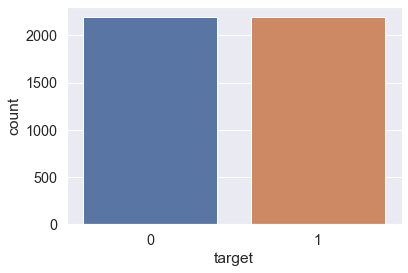

In [11]:
sns.countplot(df_text_balanced['target'])

In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.stem import PorterStemmer


In [15]:
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
  

In [16]:

total_stopwords = set(stopwords.words('english'))


negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'mustn', 'their', 'themselves', 't', 'her', 'he', 'yours', 'on', 'just', 'hasn', 'because', 'o', "that'll", 'him', 'over', 'than', 's', 'your', 'didn', 'isn', 'was', 'such', 'all', 'will', 'up', 'needn', 'is', 'himself', 'being', 'does', 'so', 'as', 'm', "you've", "it's", 'down', 'off', 'aren', 'these', 're', 'until', 'the', 'here', 'were', 'above', 'shouldn', 'both', 'should', 'very', 'some', 'which', 'of', "you'll", 'be', 'them', 'do', 'only', 'weren', 'll', 'or', 'what', 'if', 'through', 'ain', 'a', 'ourselves', 'before', 'mightn', 'it', 'further', 'd', 'haven', 'ma', 'own', 'each', 'this', 'where', 'by', 'been', 'having', 'i', 'an', 'too', 'against', 'y', 'me', 'and', 'again', 'below', 'she', 'hadn', 'his', "should've", "she's", 'shan', "you'd", 'about', 'couldn', 'you', 'hers', 'its', 'whom', 'then', 'but', 'when', 'how', 'that', 'after', 'won', 'doing', 'in', 'from', 'why', 'they', 'theirs', 'for', 'there', 'at', 'one', 'same', 'herself', 'wouldn', 'am', 'are', 'those', 'with', 

In [17]:
def preprocessor(review):
    
    review = HTMLTAGS.sub(r'', review)

 
    review = review.translate(table)
    
   
    review = review.translate(remove_digits)
    
   
    review = review.lower()
    
   
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
   
    review = [word for word in review.split()
              if word not in final_stopwords]
    
   
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [18]:
df_text_balanced.Text=df_text_balanced.Text.apply(preprocessor)

In [19]:
X = df_text_balanced['Text']
y = df_text_balanced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [21]:
print(X_train.shape)

(3068, 10811)


In [22]:
print(X_test.shape)

(1316, 10811)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:

clf = RandomForestClassifier().fit(X_train,y_train)



preds = clf.predict(X_test)

acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 77.13%


In [36]:
def raw_test(review, model, vectorizer):
   
    review_c = preprocessor(review)
   
    embedding = vectorizer.transform([review_c])
   
    prediction = model.predict(embedding)
  
    return "Positive" if prediction == 1 else "Negative"

In [37]:
review_1 = "That's a good Dish, Good Job"
review_2 = "That's the worst Dish ever tasted"

In [38]:
raw_test(review_1, clf, vectorizer)

'Positive'

In [39]:
raw_test(review_2, clf, vectorizer)

'Negative'

In [33]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
    
with open("clf.pkl", "wb") as f:
    pickle.dump(clf, f)
loaded_model = pickle.load(open("clf.pkl", 'rb'))
loaded_vect = pickle.load(open("vectorizer.pkl", 'rb'))

In [34]:
raw_test(review_1, loaded_model, loaded_vect)

'Positive'

In [35]:
raw_test(review_2, loaded_model, loaded_vect)

'Negative'

In [32]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
